## Build a Basic ChatBot using LangGraph GraphAPI

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END

from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):

    # messages have the  type lst.The add_messages function 
    # in the annotation how this state key should be updated
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [4]:
graph_builder

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()

#load data


True

In [13]:
# Define LLM
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model


#initilize LLM
llm=ChatGroq(model="llama-3.1-8b-instant")

In [14]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001ED75ABB4D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001ED75ABBED0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [15]:
llm=init_chat_model("groq:llama-3.1-8b-instant")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001ED75A62D70>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001ED75A636F0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [16]:
# Node Functionality

def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [17]:
graph_builder=StateGraph(State)

#Adding Node
graph_builder.add_node("llmchatbot",chatbot)

# Add Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

# compile the graph

graph = graph_builder.compile()

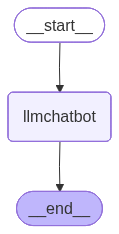

In [18]:
graph

In [20]:
response=graph.invoke({"messages":"Hi"})

In [21]:
response["messages"]

[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='b8f629f3-10cc-46d8-9b8f-6979c0e39e4b'),
 AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 36, 'total_tokens': 44, 'completion_time': 0.005657775, 'prompt_time': 0.00462477, 'queue_time': 0.212552437, 'total_time': 0.010282545}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_90c2e79dab', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--4aa261ab-3627-4483-ba79-99fbc8bc041f-0', usage_metadata={'input_tokens': 36, 'output_tokens': 8, 'total_tokens': 44})]

In [23]:
response["messages"][-1].content

'How can I assist you today?'